# Insights

## Set up and configure connection to SDK

In [41]:
import datarobot as dr #needs 2.25 or later
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from datarobot.errors import ClientError

In [42]:
dr.Client(config_path = '/Volumes/GoogleDrive/My Drive/Configurations/drconfig.yaml')

### Set up custom plot colors

In [43]:
#dr_background = '#08233F'
dr_background = '#FFFFFF'
dr_blue = '#1F77B4'
dr_orange = '#FF7F0E'
dr_red = '#BE3C28'

### Run auxiliary functions
Run the functions at the end of this notebook

## Load project

In [44]:
projectPickle = open('projectAUTO.pickle','rb')
project = pickle.load(projectPickle)
projectPickle.close()

## List trained models

All the models trained are sorted on the LeaderBoard, using the metric selected for the project:

In [45]:
met = project.metric
print(met)

LogLoss


In [46]:
leaderBoard = project.get_models()
print('{} models trained in "{}"'.format(len(leaderBoard), project.project_name))

95 models trained in "Fault prediction from sensor data Orsted AUTO"


In [47]:
best_model = leaderBoard[0]
for m in leaderBoard:
    modelScore = m.metrics[project.metric]['crossValidation']
    if isinstance(modelScore, float):
        if modelScore < best_model.metrics[project.metric]['crossValidation']:
            best_model = m
    print('{} - {}'.format(m.model_type, modelScore))

eXtreme Gradient Boosted Trees Classifier with Unsupervised Learning Features - 0.133496
AVG Blender - 0.13026
ENET Blender - 0.12918000000000002
eXtreme Gradient Boosted Trees Classifier - 0.13395200000000002
eXtreme Gradient Boosted Trees Classifier with Unsupervised Learning Features - 0.1278
ENET Blender - 0.124228
eXtreme Gradient Boosted Trees Classifier with Unsupervised Learning Features - 0.129662
Gradient Boosted Trees Classifier - 0.14668399999999998
eXtreme Gradient Boosted Trees Classifier with Unsupervised Learning Features - 0.119868
Advanced AVG Blender - 0.128578
eXtreme Gradient Boosted Trees Classifier - 0.138462
Generalized Additive2 Model - 0.15742799999999998
Light Gradient Boosted Trees Classifier with Early Stopping - 0.134248
Gradient Boosted Greedy Trees Classifier - 0.145418
RandomForest Classifier (Entropy) - 0.14944600000000002
ExtraTrees Classifier (Gini) - None
Gradient Boosted Trees Classifier - None
RandomForest Classifier (Gini) - None
Light Gradient B

Select the model with the best holdout score

In [48]:
print(best_model.model_type)
print(best_model.get_leaderboard_ui_permalink())

eXtreme Gradient Boosted Trees Classifier with Unsupervised Learning Features
https://app.datarobot.com/projects/619d1a12969b183f3496b677/models/619d25349296834ba050b124


In [49]:
best_model.metrics

{'AUC': {'validation': 0.97344,
  'crossValidation': 0.9788539999999999,
  'holdout': 0.98743,
  'training': None,
  'backtestingScores': None,
  'backtesting': None},
 'Area Under PR Curve': {'validation': 0.93646,
  'crossValidation': 0.941886,
  'holdout': 0.94894,
  'training': None,
  'backtestingScores': None,
  'backtesting': None},
 'FVE Binomial': {'validation': 0.72634,
  'crossValidation': 0.729322,
  'holdout': 0.75553,
  'training': None,
  'backtestingScores': None,
  'backtesting': None},
 'Gini Norm': {'validation': 0.94688,
  'crossValidation': 0.957708,
  'holdout': 0.97486,
  'training': None,
  'backtestingScores': None,
  'backtesting': None},
 'Kolmogorov-Smirnov': {'validation': 0.85174,
  'crossValidation': 0.871228,
  'holdout': 0.88027,
  'training': None,
  'backtestingScores': None,
  'backtesting': None},
 'LogLoss': {'validation': 0.12214,
  'crossValidation': 0.119868,
  'holdout': 0.10814,
  'training': None,
  'backtestingScores': None,
  'backtesting':

## Compliance documentation

You can automatically generate compliance documentation.

In [14]:
doc = dr.ComplianceDocumentation(project.id, best_model.id)
# Start a job to generate documentation
job = doc.generate()
# Once the job is complete, download as a DOCX
job.wait_for_completion()
doc.download('Generated/compliance.docx')

/var/folders/3j/qdr5dw0j0gs3q36f5kztxpf40000gp/T/ipykernel_50243/2680082757.py:1: DataRobotDeprecationWarning: `ComplianceDocumentation` has been deprecated in `v2.24`, will be removed in `v2.27`. Use AutomatedDocument instead.
  doc = dr.ComplianceDocumentation(project.id, best_model.id)


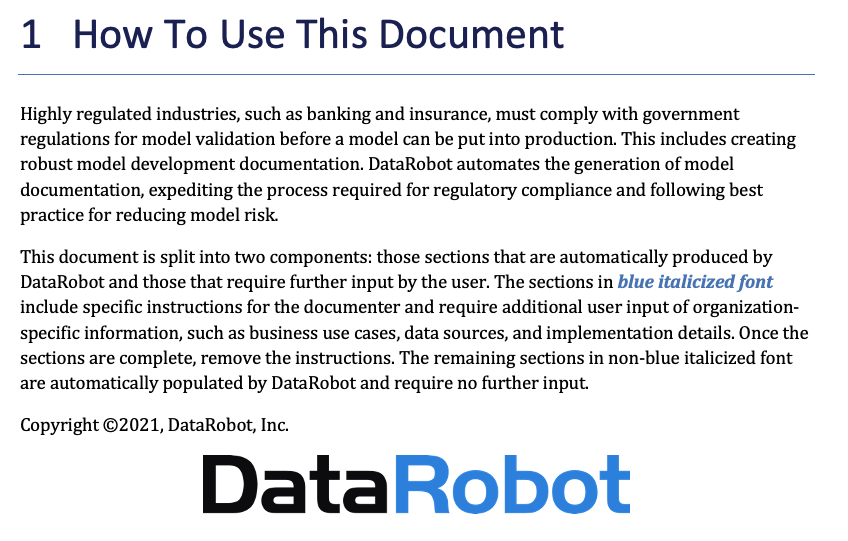

There are also other kinds of documentation that you can access:

In [15]:
options = dr.AutomatedDocument.list_available_document_types()
for option in options['data']:
    print(option)

{'document_type': 'AUTOPILOT_SUMMARY', 'locale': 'EN_US'}
{'document_type': 'AUTOPILOT_SUMMARY', 'locale': 'JA_JP'}
{'document_type': 'MODEL_COMPLIANCE', 'locale': 'EN_US'}
{'document_type': 'DEPLOYMENT_REPORT', 'locale': 'EN_US'}
{'document_type': 'DEPLOYMENT_REPORT', 'locale': 'JA_JP'}


List the previously generated documents:

In [16]:
model_docs = dr.AutomatedDocument.list_generated_documents()
for (i, model_doc) in enumerate(model_docs):
    print("{} - {}".format(i, model_doc))

0 - AutomatedDocument(entity_id=619bbb3afd02371963166474, document_type=MODEL_COMPLIANCE, output_format=docx, locale=EN_US, template_id=None, id=619d1c016e4cd5abe771fd68, filepath=None, created_at=2021-11-23 16:51:13.605000+00:00)
1 - AutomatedDocument(entity_id=612d61fda54da0dec46cf3b7, document_type=DEPLOYMENT_REPORT, output_format=docx, locale=EN_US, template_id=None, id=619be211707c6e7ff3721a62, filepath=None, created_at=2021-11-22 18:31:45.066000+00:00)
2 - AutomatedDocument(entity_id=619bbb3afd02371963166474, document_type=MODEL_COMPLIANCE, output_format=docx, locale=EN_US, template_id=None, id=619bd2591ce8423291e8e932, filepath=None, created_at=2021-11-22 17:24:41.126000+00:00)
3 - AutomatedDocument(entity_id=61952a5cf34a8abf264b8325, document_type=MODEL_COMPLIANCE, output_format=docx, locale=EN_US, template_id=None, id=619540e991044be549e8c43f, filepath=None, created_at=2021-11-17 17:50:33.098000+00:00)
4 - AutomatedDocument(entity_id=5f3adcc3bd70b102b594bbe8, document_type=DEP

## Inspect the best model

You have direct access to standard and advanced insights, for each model you train

### metrics

In [50]:
best_model.metrics

{'AUC': {'validation': 0.97344,
  'crossValidation': 0.9788539999999999,
  'holdout': 0.98743,
  'training': None,
  'backtestingScores': None,
  'backtesting': None},
 'Area Under PR Curve': {'validation': 0.93646,
  'crossValidation': 0.941886,
  'holdout': 0.94894,
  'training': None,
  'backtestingScores': None,
  'backtesting': None},
 'FVE Binomial': {'validation': 0.72634,
  'crossValidation': 0.729322,
  'holdout': 0.75553,
  'training': None,
  'backtestingScores': None,
  'backtesting': None},
 'Gini Norm': {'validation': 0.94688,
  'crossValidation': 0.957708,
  'holdout': 0.97486,
  'training': None,
  'backtestingScores': None,
  'backtesting': None},
 'Kolmogorov-Smirnov': {'validation': 0.85174,
  'crossValidation': 0.871228,
  'holdout': 0.88027,
  'training': None,
  'backtestingScores': None,
  'backtesting': None},
 'LogLoss': {'validation': 0.12214,
  'crossValidation': 0.119868,
  'holdout': 0.10814,
  'training': None,
  'backtestingScores': None,
  'backtesting':

In [51]:
roc = best_model.get_roc_curve('holdout')
df = pd.DataFrame(roc.roc_points)
df.head()

,accuracy,f1_score,false_negative_score,true_negative_score,true_positive_score,false_positive_score,true_negative_rate,false_positive_rate,true_positive_rate,matthews_correlation_coefficient,positive_predictive_value,negative_predictive_value,threshold,fraction_predicted_as_positive,fraction_predicted_as_negative,lift_positive,lift_negative
0,0.838384,0.000000,64,332,0,0,1.0,0.0,0.000000,0.000000,0.0,0.838384,1.000000,0.000000,1.000000,0.0000,1.000000
1,0.840909,0.030769,63,332,1,0,1.0,0.0,0.015625,0.114599,1.0,0.840506,0.997601,0.002525,0.997475,6.1875,1.002532
2,0.848485,0.117647,60,332,4,0,1.0,0.0,0.062500,0.230073,1.0,0.846939,0.996090,0.010101,0.989899,6.1875,1.010204
3,0.858586,0.222222,56,332,8,0,1.0,0.0,0.125000,0.327046,1.0,0.855670,0.994630,0.020202,0.979798,6.1875,1.020619
4,0.868687,0.315789,52,332,12,0,1.0,0.0,0.187500,0.402628,1.0,0.864583,0.994153,0.030303,0.969697,6.1875,1.031250


You can use this to plot RoC, F1 score, etc.

(0.0, 1.0)

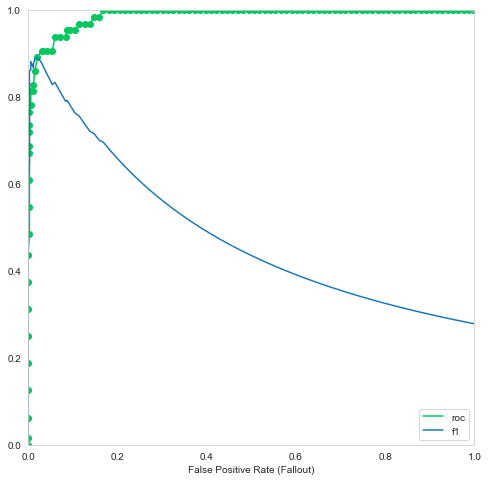

In [52]:
dr_roc_green = '#03c75f'
white = '#ffffff'
dr_purple = '#65147D'
dr_dense_green = '#018f4f'

fig = plt.figure(figsize=(8, 8))
axes = fig.add_subplot(1, 1, 1, facecolor=dr_background)

plt.scatter(df.false_positive_rate, df.true_positive_rate, color=dr_roc_green)
plt.plot(df.false_positive_rate, df.true_positive_rate, color=dr_roc_green, label='roc')
plt.plot(df.false_positive_rate, df.f1_score, label='f1')
plt.legend()
plt.plot([0, 1], [0, 1], color=white, alpha=0.25)
plt.xlabel('False Positive Rate (Fallout)')
plt.xlim([0, 1])
plt.ylim([0, 1])

## Feature impact

Check out the [full docs](https://datarobot-public-api-client.readthedocs-hosted.com/en/v2.26.1/examples/advanced_model_insights/Advanced_Model_Insights.html?highlight=roc%20curve#Feature-Impact)

In [20]:
feature_impacts = best_model.get_or_request_feature_impact()

In [21]:
feature_impacts

[{'featureName': 'biSecondlyReadings[sensor_q1] (5 minutes median)',
  'impactNormalized': 1.0,
  'impactUnnormalized': 0.008579722505943285,
  'redundantWith': None},
 {'featureName': 'biSecondlyReadings[sensor_s4] (3 hours min)',
  'impactNormalized': 0.6189246304794335,
  'impactUnnormalized': 0.005310201581607027,
  'redundantWith': None},
 {'featureName': 'biSecondlyReadings[sensor_t2] (3 hours std)',
  'impactNormalized': 0.5050083890598576,
  'impactUnnormalized': 0.004332831841307023,
  'redundantWith': None},
 {'featureName': 'biSecondlyReadings[sensor_s3] (1 minute avg)',
  'impactNormalized': 0.5035700084428616,
  'impactUnnormalized': 0.0043204909347552695,
  'redundantWith': None},
 {'featureName': 'biSecondlyReadings[sensor_s4] (5 minutes max)',
  'impactNormalized': 0.45687430177435273,
  'impactUnnormalized': 0.003919854729320538,
  'redundantWith': None},
 {'featureName': 'biSecondlyReadings[sensor_t1] (1 minute median)',
  'impactNormalized': 0.4538425206777708,
  'im

Plot some things

Text(0.5, 1.04, 'Feature Impact')

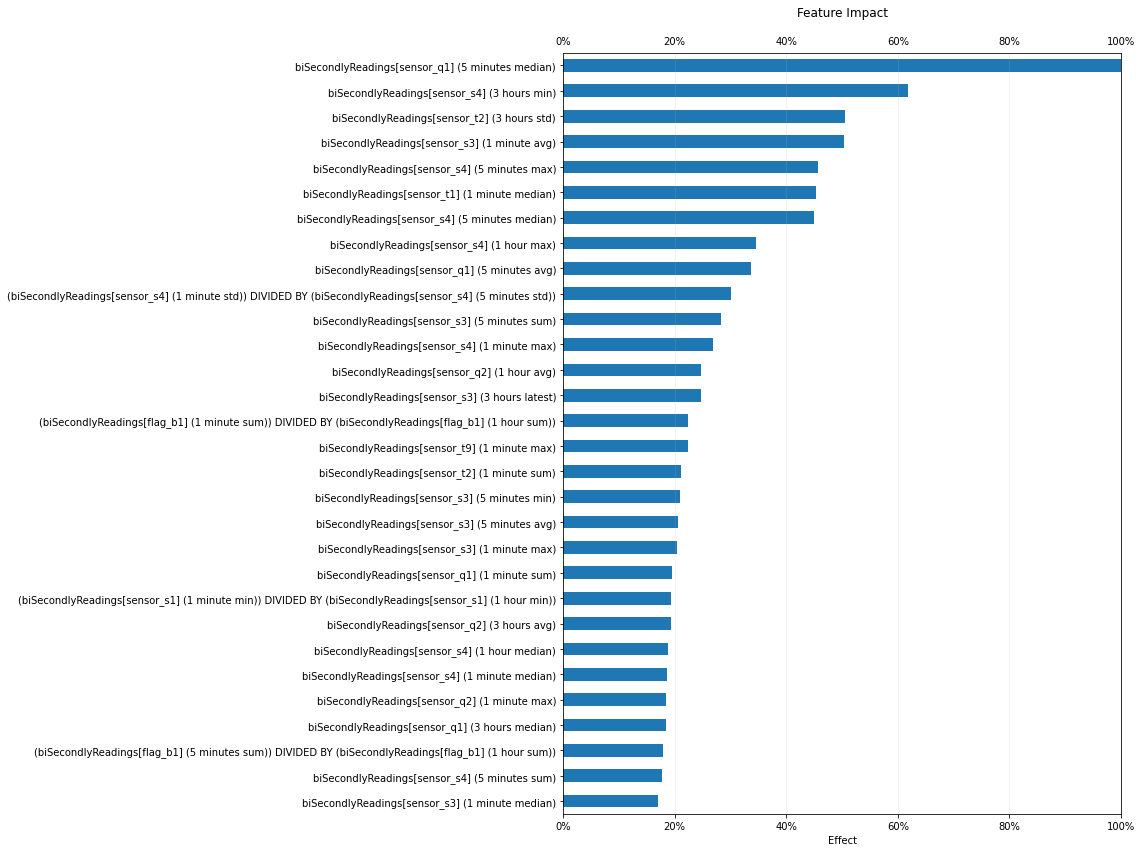

In [22]:
# Formats the ticks from a float into a percent
percent_tick_fmt = mtick.PercentFormatter(xmax=1.0)

n_elem = min(30,len(feature_impacts))
impact_df = pd.DataFrame(feature_impacts[0:n_elem])
impact_df.sort_values(by='impactNormalized', ascending=True, inplace=True)

# Positive values are blue, negative are red
bar_colors = impact_df.impactNormalized.apply(lambda x: dr_red if x < 0
                                              else dr_blue)

ax = impact_df.plot.barh(x='featureName', y='impactNormalized',
                         legend=False,
                         color=bar_colors,
                         figsize=(10, 14))
ax.xaxis.set_major_formatter(percent_tick_fmt)
ax.xaxis.set_tick_params(labeltop=True)
ax.xaxis.grid(True, alpha=0.2)
ax.set_facecolor(dr_background)

plt.ylabel('')
plt.xlabel('Effect')
plt.xlim((None, 1))  # Allow for negative impact
plt.title('Feature Impact', y=1.04)

### Prediction Distributions

Text(0, 0.5, 'Probability Density')

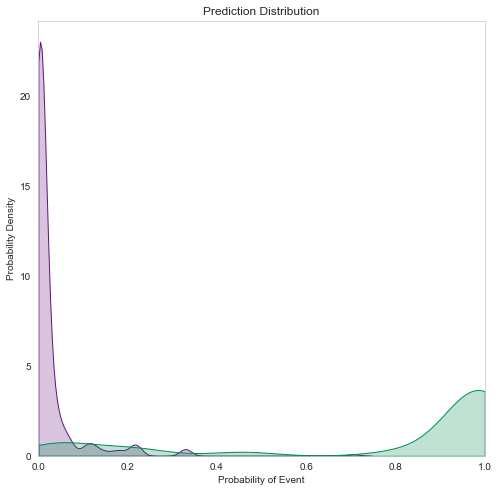

In [23]:
sns.set_style("whitegrid", {'axes.grid': False})

fig = plt.figure(figsize=(8, 8))
axes = fig.add_subplot(1, 1, 1, facecolor=dr_background)

shared_params = {'shade': True, 'clip': (0, 1), 'bw_method': 0.2}
sns.kdeplot(np.array(roc.negative_class_predictions),
            color=dr_purple, **shared_params)
sns.kdeplot(np.array(roc.positive_class_predictions),
            color=dr_dense_green, **shared_params)

plt.title('Prediction Distribution')
plt.xlabel('Probability of Event')
plt.xlim([0, 1])
plt.ylabel('Probability Density')

### Lift chart

In [24]:
lc = best_model.get_lift_chart('holdout')

In [25]:
bins_df = pd.DataFrame(lc.bins)
bins_df.head()

,actual,predicted,bin_weight
0,0.0,0.000851,7.0
1,0.0,0.000949,7.0
2,0.0,0.000982,6.0
3,0.0,0.001099,7.0
4,0.0,0.001230,6.0


let's plot it

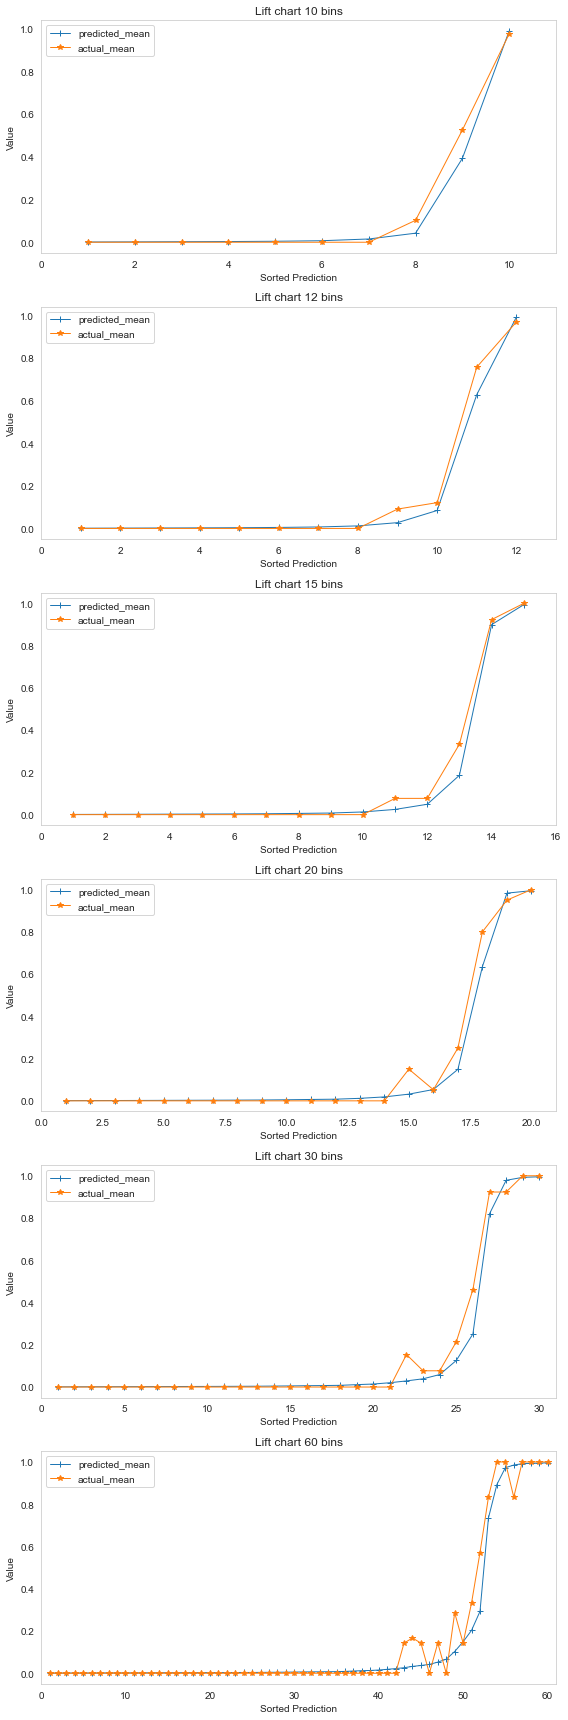

In [32]:
bin_counts = [10, 12, 15, 20, 30, 60]
f, axarr = plt.subplots(len(bin_counts))
f.set_size_inches((8, 4 * len(bin_counts)))

rebinned_dfs = []
for i in range(len(bin_counts)):
    rebinned_dfs.append(matplotlib_lift(bins_df, bin_counts[i], axarr[i]))
plt.tight_layout()

### Feature histogram

Plot the feature histogram of the first few highly ranked features

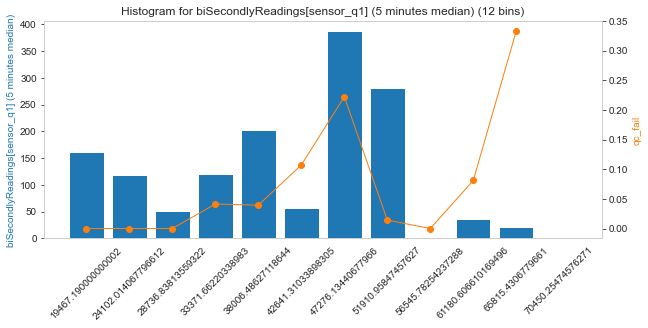

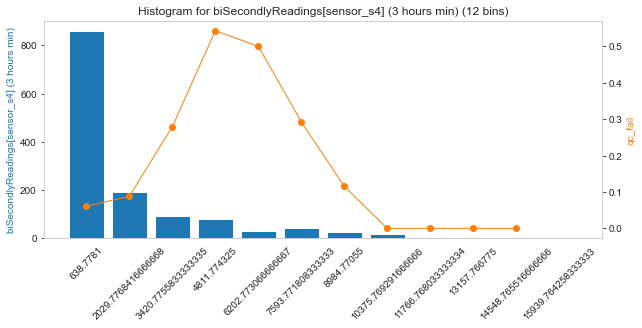

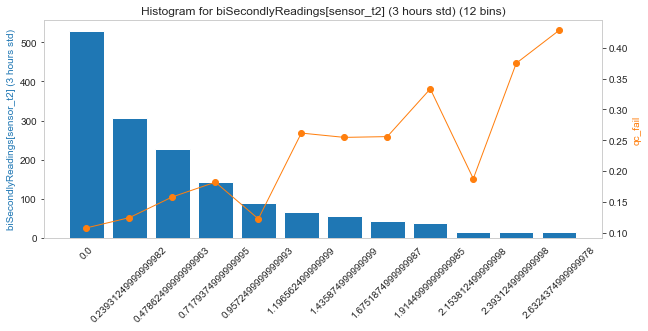

In [33]:
for i in range(0,3):
    f = feature_impacts[i]
    draw_feature_histogram(f['featureName'], project.target, 12)

### Lift chart

In [34]:
lc = best_model.get_lift_chart('holdout')

In [35]:
bins_df = pd.DataFrame(lc.bins)
bins_df.head()

,actual,predicted,bin_weight
0,0.0,0.000851,7.0
1,0.0,0.000949,7.0
2,0.0,0.000982,6.0
3,0.0,0.001099,7.0
4,0.0,0.001230,6.0


let's plot it

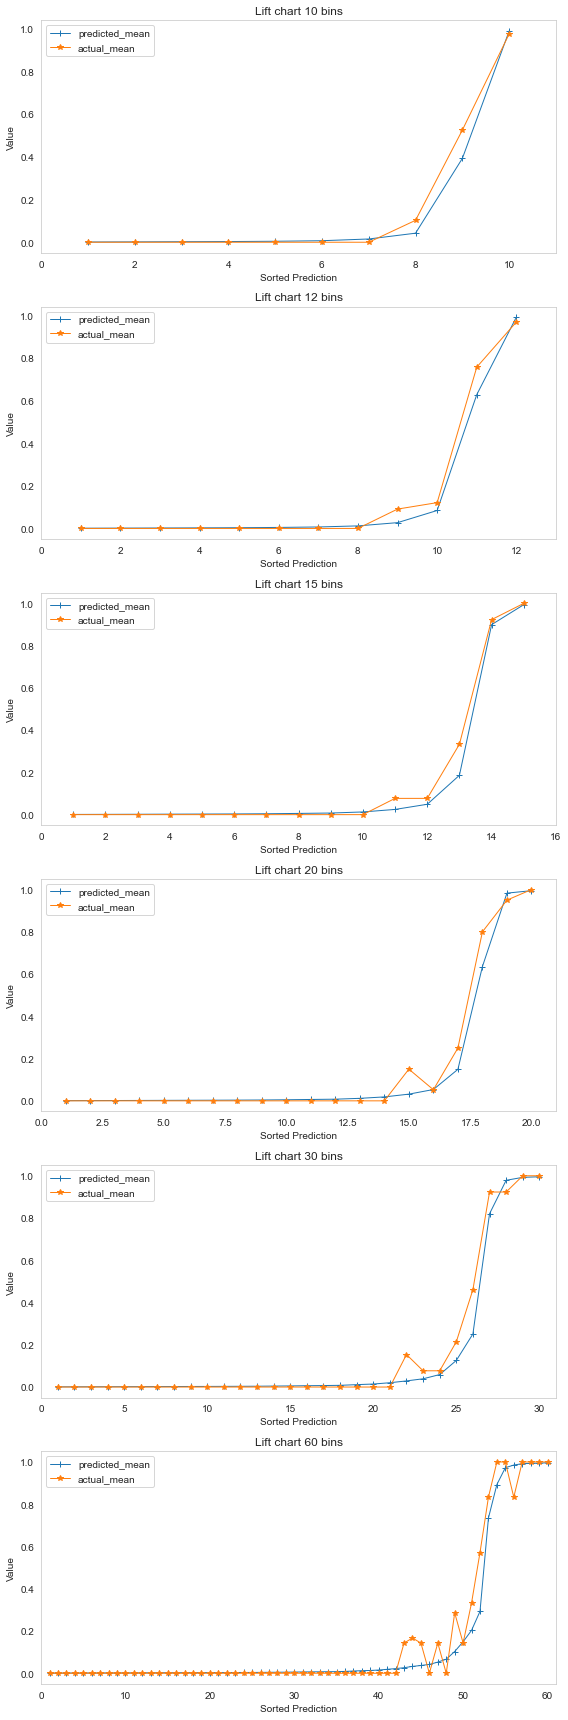

In [36]:
bin_counts = [10, 12, 15, 20, 30, 60]
f, axarr = plt.subplots(len(bin_counts))
f.set_size_inches((8, 4 * len(bin_counts)))

rebinned_dfs = []
for i in range(len(bin_counts)):
    rebinned_dfs.append(matplotlib_lift(bins_df, bin_counts[i], axarr[i]))
plt.tight_layout()


## Selecting this model for deployment

If we are convinced this is the right model, we can prepare it for 1-keystroke deployment.

If this hasn't been done yet, this will make the model go through the various recommendation stages including retraining on a reduced feature list and retraining the model on a higher sample size (recent data for datetime partitioned).

In [37]:
modelForDeployment = best_model

In [38]:
project.start_prepare_model_for_deployment(model_id=modelForDeployment.id)

## Save model

In [39]:
deploymentModel = dict()
deploymentModel['project'] = project
deploymentModel['model'] = modelForDeployment

In [40]:
filename = 'deploymentModel.pickle'
outfile = open(filename,'wb')
pickle.dump(deploymentModel,outfile)
outfile.close()

## Notes

There are many more insights for specific models or features, such as
- Tree-based variable rankings for relevancy of different variables on the prediction
- Hotspots for graphical interpretation of rules describing high predictive performance
- Variable effects to illustrate the magnitude and direction of a feature's effect on a model's predictions
- Text mining charts to display the most relevant words and short phrases in text, indicating strength of correlation with target
- Anomaly detection for summary table of anomaly results
- Word cloud of keyword relevancy

Check the [docs](https://datarobot-public-api-client.readthedocs-hosted.com/en/v2.26.1/examples/advanced_model_insights/Advanced_Model_Insights.html?highlight=roc%20curve#Advanced-Model-Insights)

### Auxiliary functions

In [27]:
def matplotlib_pair_histogram(labels, counts, target_avgs,
                              target_feature_name,
                              bin_count, ax1, feature):
    # Rotate categorical labels
    if feature.feature_type in ['Categorical', 'Text', 'Numeric']:
        ax1.tick_params(axis='x', rotation=45)
    ax1.set_ylabel(feature.name, color=dr_blue)
    ax1.bar(labels, counts, color=dr_blue)
    # Instantiate a second axes that shares the same x-axis
    ax2 = ax1.twinx()
    ax2.set_ylabel(target_feature_name, color=dr_orange)
    ax2.plot(labels, target_avgs, marker='o', lw=1, color=dr_orange)
    ax1.set_facecolor(dr_background)
    title = 'Histogram for {} ({} bins)'.format(feature.name, bin_count)
    ax1.set_title(title)

In [28]:
def draw_feature_histogram(feature_name, target_feature_name, bin_count):
    feature = dr.Feature.get(project.id, feature_name)
    # Retrieve downsampled histogram data from server
    # based on desired bin count
    data = feature.get_histogram(bin_count).plot
    labels = [row['label'] for row in data]
    counts = [row['count'] for row in data]
    target_averages = [row['target'] for row in data]
    f, axarr = plt.subplots()
    f.set_size_inches((10, 4))
    matplotlib_pair_histogram(labels, counts, target_averages,
                              target_feature_name,
                              bin_count, axarr, feature)

In [29]:
def rebin_df(raw_df, number_of_bins):
    cols = ['bin', 'actual_mean', 'predicted_mean', 'bin_weight']
    new_df = pd.DataFrame(columns=cols)
    current_prediction_total = 0
    current_actual_total = 0
    current_row_total = 0
    x_index = 1
    bin_size = 60 / number_of_bins
    for rowId, data in raw_df.iterrows():
        current_prediction_total += data['predicted'] * data['bin_weight']
        current_actual_total += data['actual'] * data['bin_weight']
        current_row_total += data['bin_weight']

        if ((rowId + 1) % bin_size == 0):
            x_index += 1
            bin_properties = {
                'bin': ((round(rowId + 1) / 60) * number_of_bins),
                'actual_mean': current_actual_total / current_row_total,
                'predicted_mean': current_prediction_total / current_row_total,
                'bin_weight': current_row_total
            }

            new_df = new_df.append(bin_properties, ignore_index=True)
            current_prediction_total = 0
            current_actual_total = 0
            current_row_total = 0
    return new_df

In [30]:
def matplotlib_lift(bins_df, bin_count, ax):
    grouped = rebin_df(bins_df, bin_count)
    ax.plot(range(1, len(grouped) + 1), grouped['predicted_mean'],
            marker='+', lw=1, color=dr_blue, label='predicted_mean')
    ax.plot(range(1, len(grouped) + 1), grouped['actual_mean'],
            marker='*', lw=1, color=dr_orange, label='actual_mean')
    ax.set_xlim([0, len(grouped) + 1])
    ax.set_facecolor(dr_background)
    ax.legend(loc='best')
    ax.set_title('Lift chart {} bins'.format(bin_count))
    ax.set_xlabel('Sorted Prediction')
    ax.set_ylabel('Value')
    return grouped